<a href="https://colab.research.google.com/github/sai-krishna-dalai-333/AI-ML/blob/main/mini_2(har).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading raw data file
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df_har = pd.read_csv('/content/WISDM_ar_v1.1_raw.txt', header = None, names = columns)

In [ ]:
df_har

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
...,...,...,...,...,...,...
18739,20,Walking,543172313000,3.870000,15.550000,1.3756552;
18740,20,Walking,543222270000,2.910000,7.160000,-2.7240696;
18741,20,Walking,543272288000,-1.880000,4.560000,-1.56634;
18742,20,Walking,543322276000,-3.720000,4.480000,-2.070293;


In [ ]:
df_har.head(20)

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526;
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926;
7,33,Jogging,49106652389000,-0.503953,13.947236,7.0553403;
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871;
9,33,Jogging,49106872299000,0.953424,1.375655,1.6480621;


In [ ]:
df_har = df_har.dropna()
df_har.shape

(18743, 6)

In [ ]:
# transforming the z-axis to float
df_har['z-axis'] = df_har['z-axis'].str.replace(';', '')
df_har['z-axis'] = df_har['z-axis'].apply(lambda x:float(x))

In [ ]:
df_har

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
18738,20,Walking,543122264000,-2.140000,18.200000,-3.173541
18739,20,Walking,543172313000,3.870000,15.550000,1.375655
18740,20,Walking,543222270000,2.910000,7.160000,-2.724070
18741,20,Walking,543272288000,-1.880000,4.560000,-1.566340


In [ ]:
# drop rows where timestamp is 0
df = df_har[df_har['timestamp'] != 0]
df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
18738,20,Walking,543122264000,-2.140000,18.200000,-3.173541
18739,20,Walking,543172313000,3.870000,15.550000,1.375655
18740,20,Walking,543222270000,2.910000,7.160000,-2.724070
18741,20,Walking,543272288000,-1.880000,4.560000,-1.566340


In [ ]:
# arrange data in ascending order of user and timestamp
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)

In [ ]:
df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,17,Walking,57869902574000,0.572055,9.806650,-0.531194
1,17,Walking,57870012316000,-0.000000,10.188020,-0.572055
2,17,Walking,57870122301000,-0.231546,9.847511,-0.694638
3,17,Walking,57870222246000,0.149824,10.079058,-0.503953
4,17,Walking,57870332292000,0.149824,10.147159,-0.612916
...,...,...,...,...,...,...
18654,33,Jogging,55736772294000,2.642348,9.888372,-0.000000
18655,33,Jogging,55736822252000,2.560625,9.466142,-0.081722
18656,33,Jogging,55736932298000,1.457377,10.882658,-0.653777
18657,33,Jogging,55737042314000,2.410802,9.534244,-0.503953


**Exploratory Data Analysis**

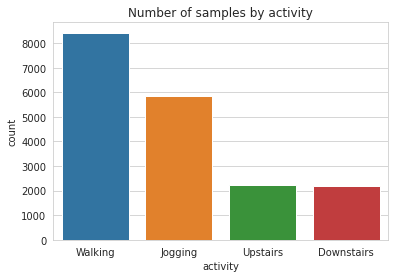

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = 'activity', data = df)
plt.title('Number of samples by activity')
plt.show()

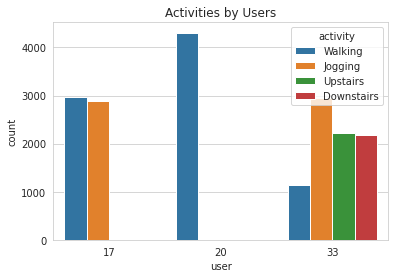

In [ ]:
sns.countplot(x = 'user',  hue = 'activity', data = df)
plt.title('Activities by Users')
plt.show()

## **Preparing Data**

In [ ]:
random_seed = 42   
n_time_steps = 50 
n_features = 3 
step = 10 
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015

In [ ]:
from scipy import stats as s
segments = []
labels = []

for i in range(0,  df.shape[0]- n_time_steps, step):  
    xs = df['x-axis'].values[i: i + 50]
    ys = df['y-axis'].values[i: i + 50]
    zs = df['z-axis'].values[i: i + 50]
    label = s.mode(df['activity'][i: i + 50])[0][0][0]
    segments.append([xs, ys, zs])
    labels.append(label)
#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [ ]:
reshaped_segments.shape

(1861, 50, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1488, 50, 3) (1488, 4)
(373, 50, 3) (373, 4)


In [ ]:
X_test

array([[[ 5.5162406 ,  0.04086104,  4.440233  ],
        [ 2.2609777 ,  1.3075534 ,  4.2086873 ],
        [ 2.9147544 ,  5.5571017 ,  5.9793324 ],
        ...,
        [ 0.46309182, -0.53119355,  2.6832085 ],
        [ 6.3198414 , -1.7570249 , -3.255263  ],
        [ 0.23154591, -0.29964766, -1.1168685 ]],

       [[ 0.14982383, -1.334794  ,  7.8180795 ],
        [ 2.4925237 ,  5.597963  , -5.7477865 ],
        [10.147159  , -2.1792557 , -3.568531  ],
        ...,
        [-5.7477865 , -0.95342433,  5.134871  ],
        [-1.6889231 ,  0.7627395 ,  5.012288  ],
        [-0.        ,  2.982856  , -0.04086104]],

       [[ 0.313268  ,  4.671779  , -3.2961242 ],
        [ 4.372132  , -1.6480621 , -0.3405087 ],
        [-5.597963  , -2.7240696 ,  0.08172209],
        ...,
        [-4.140586  , -2.4108016 , -3.214402  ],
        [ 0.23154591,  1.0351465 , -0.7627395 ],
        [-0.6537767 , -0.29964766,  9.00305   ]],

       ...,

       [[ 1.1168685 ,  5.09401   ,  1.2666923 ],
        [ 4

# **Building Model Architecture**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout


In [ ]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 76,100
Trainable params: 76,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)

Epoch 1/50
2/2 [==============================] - 7s 490ms/step - loss: 1.4267 - accuracy: 0.2891 - val_loss: 1.3200 - val_accuracy: 0.5570
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 1.3271 - accuracy: 0.4857 - val_loss: 1.2245 - val_accuracy: 0.5738
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 1.2319 - accuracy: 0.5546 - val_loss: 1.1276 - val_accuracy: 0.6242
Epoch 4/50
2/2 [==============================] - 0s 30ms/step - loss: 1.1432 - accuracy: 0.5874 - val_loss: 1.0193 - val_accuracy: 0.6477
Epoch 5/50
2/2 [==============================] - 0s 31ms/step - loss: 1.0205 - accuracy: 0.6101 - val_loss: 0.9111 - val_accuracy: 0.6242
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.9218 - accuracy: 0.5958 - val_loss: 0.8334 - val_accuracy: 0.6208
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 0.8369 - accuracy: 0.6126 - val_loss: 0.7640 - val_accuracy: 0.6443
Epoch 8/50
2/2 [==========

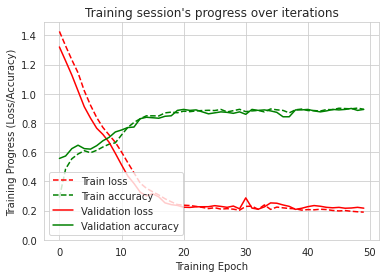

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

1/1 [==============================] - 0s 23ms/step - loss: 0.2245 - accuracy: 0.8928
Test Accuracy : 0.8927614092826843
Test Loss : 0.22445212304592133


12/12 [==============================] - 0s 3ms/step


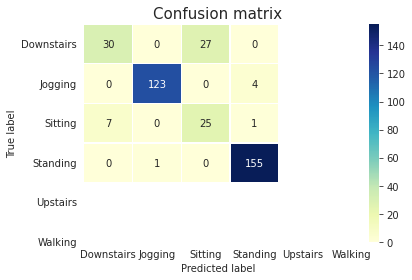

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
predictions

array([[1.8174159e-03, 1.6196329e-02, 1.9264640e-03, 9.8005980e-01],
       [5.7376332e-05, 9.9936122e-01, 1.3914137e-04, 4.4219074e-04],
       [9.2300026e-05, 6.5831440e-03, 8.3938728e-05, 9.9324059e-01],
       ...,
       [1.7959159e-04, 5.1312288e-03, 1.7840229e-04, 9.9451077e-01],
       [4.3738455e-01, 2.3481143e-03, 5.5803353e-01, 2.2337374e-03],
       [1.2583952e-04, 5.7634087e-03, 1.4639128e-04, 9.9396437e-01]],
      dtype=float32)

In [ ]:
max_test

array([3, 1, 3, 1, 1, 2, 0, 3, 3, 2, 1, 1, 2, 2, 3, 0, 3, 1, 3, 0, 1, 0,
       3, 0, 1, 0, 1, 1, 3, 0, 0, 1, 0, 2, 0, 2, 0, 1, 3, 1, 1, 3, 1, 1,
       0, 1, 1, 3, 0, 1, 3, 3, 2, 1, 3, 3, 0, 2, 3, 3, 0, 1, 0, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 1, 1, 3, 3, 3, 3, 1, 2, 3, 3,
       3, 1, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 2, 1, 0, 2, 2, 3, 0, 3, 2,
       3, 3, 3, 0, 3, 3, 1, 1, 3, 1, 0, 3, 1, 3, 3, 1, 3, 1, 2, 3, 1, 3,
       0, 1, 0, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       0, 3, 3, 1, 1, 1, 1, 0, 3, 1, 3, 2, 3, 2, 2, 1, 3, 1, 3, 3, 1, 3,
       1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 0, 1, 3, 3, 2, 1, 0, 2, 1, 1, 0,
       1, 3, 3, 0, 0, 3, 1, 1, 3, 3, 1, 1, 3, 0, 3, 3, 3, 3, 3, 1, 2, 3,
       3, 1, 0, 0, 3, 2, 3, 3, 0, 1, 3, 3, 3, 1, 0, 3, 1, 1, 0, 2, 0, 1,
       1, 1, 1, 3, 3, 2, 0, 2, 1, 1, 3, 1, 1, 1, 0, 0, 1, 2, 3, 3, 1, 0,
       1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 1, 0, 3, 1, 2, 3,
       3, 3, 1, 1, 1, 1, 0, 3, 3, 1, 1, 3, 3, 0, 3,

In [ ]:
max_predictions

array([3, 1, 3, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 2, 3, 0, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 0, 1, 1, 3, 0, 0, 1, 2, 2, 0, 2, 2, 1, 3, 1, 1, 3, 1, 1,
       0, 3, 1, 3, 2, 1, 3, 1, 2, 1, 3, 3, 2, 2, 3, 3, 2, 1, 2, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 1, 1, 3, 3, 3, 3, 1, 2, 3, 3,
       3, 1, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 0, 1, 2, 2, 3, 3, 0, 3, 2,
       3, 3, 3, 2, 3, 3, 1, 1, 3, 1, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 1, 3,
       2, 1, 0, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       0, 3, 3, 1, 1, 1, 1, 0, 3, 1, 3, 2, 3, 0, 0, 3, 3, 1, 3, 3, 1, 3,
       1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 0, 1, 3, 3, 0, 1, 2, 2, 1, 1, 0,
       1, 3, 3, 0, 2, 3, 1, 1, 3, 3, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 2, 3,
       3, 1, 0, 0, 3, 2, 3, 3, 0, 1, 3, 3, 3, 1, 2, 3, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 3, 3, 2, 2, 2, 1, 1, 3, 1, 1, 1, 2, 0, 1, 0, 3, 3, 1, 0,
       1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 1, 0, 3, 1, 0, 3,
       3, 3, 1, 1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 0, 3,